The Affordable Care Act is a huge step forward for people who were previously uninsured, but what could happen if someone who is covered by an ACA plan gets cancer? Most likely they will have to get some sort of chemotherapy. That’s called an “Infusion Therapy” in medical speak. We wanted to take a look at how insurance companies pay for that. 

Lets have a look at dataset !!!!!!!!!!!!!

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from  matplotlib import pyplot


csv_chunks = pd.read_csv("D:\health-insurance-marketplace-release-2016-01-20-15-52-37\health-insurance-marketplace\BenefitsCostSharing.csv",iterator=True,chunksize = 1000)
rates = pd.concat(chunk for chunk in csv_chunks)
rates.shape

(5048408, 32)

BenefitName column values

In [7]:
fields = ['BenefitName']
d = []
csv_chunks = pd.read_csv("D:\health-insurance-marketplace-release-2016-01-20-15-52-37\health-insurance-marketplace\BenefitsCostSharing.csv",iterator=True,chunksize = 1000,usecols = fields)
rates = pd.concat(chunk for chunk in csv_chunks)
rates.shape
pd.value_counts(rates['BenefitName'].values, sort=True)


Orthodontia - Adult                                                                                         77377
Dental Check-Up for Children                                                                                77353
Major Dental Care - Adult                                                                                   77353
Basic Dental Care - Child                                                                                   77353
Basic Dental Care - Adult                                                                                   77353
Accidental Dental                                                                                           77353
Routine Dental Services (Adult)                                                                             77353
Major Dental Care - Child                                                                                   77353
Orthodontia - Child                                                                     

So, what we specifically looking for is the line item about “Infusion Therapy”, I’m going to subset my huge dataset to just look at those lines.



In [149]:
csv_chunks = pd.read_csv("D:\health-insurance-marketplace-release-2016-01-20-15-52-37\health-insurance-marketplace\BenefitsCostSharing.csv",iterator=True,chunksize = 1000)
rates = pd.concat(chunk for chunk in csv_chunks)
infuse = rates['BenefitName'] == "Infusion Therapy"
new_rate = rates[infuse]
new_rate.head(n=5)


,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
306,Infusion Therapy,2014,No Charge,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,73836AK0620001-01,NaN,125,HIOS,73836AK0620001,AK,AK,6
368,Infusion Therapy,2014,No Charge,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,73836AK0620002-01,NaN,125,HIOS,73836AK0620002,AK,AK,6
440,Infusion Therapy,2014,15%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,73836AK0630001-00,NaN,125,HIOS,73836AK0630001,AK,AK,6
513,Infusion Therapy,2014,15%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,73836AK0630001-01,NaN,125,HIOS,73836AK0630001,AK,AK,6
586,Infusion Therapy,2014,0%,NaN,0%,$0,NaN,$0,Additional EHB Benefit,NaN,...,NaN,NaN,73836AK0630001-02,NaN,125,HIOS,73836AK0630001,AK,AK,6


Total rows having BenefitName value as "Infusion Therapy"

In [187]:
new_rate.shape

(65704, 33)

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline
coint1 ='CoinsInnTier1'
coin = 'filtered_coin'
new_rate[coint1] = new_rate[coint1].fillna(0)
new_rate[coin] = new_rate[coint1].str.replace('%', '')

new_rate[coin].head(n=500)



C:\Users\Sunil\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sunil\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


306                            No Charge
368                            No Charge
440                                   15
513                                   15
586                                    0
659                                   15
732                                   30
805                                   30
841                                   30
930                                    0
1003                                  30
1076                                  30
1149                                  30
1243                                  15
1316                                  15
1389                                   0
1462                                  15
1535                                  30
1608                                  30
1681                                   0
1754                                  30
1827                                  30
1900                                  30
1973                                  30
2046            

In [247]:
new_rate.shape


(65704, 34)

In [226]:
d = []
for i in range(0,65704):
    if new_rate[coin].iloc[i] == "50" or new_rate[coin].iloc[i] == "40" or new_rate[coin].iloc[i] == "30" or new_rate[coin].iloc[i] == "20" or new_rate[coin].iloc[i] == "10":
        d.append(new_rate[coin].iloc[i])
    else:
        d.append('0')

        

In [228]:
new_rate['copay'] = d



C:\Users\Sunil\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [243]:
new_rate['copay'].astype(int)
dist1 = new_rate[['copay','filtered_coin']]
category_group1=dist1.groupby(['copay']).count()
category_group1.head(n=10)




,filtered_coin
copay,
0,62116
10,671
20,835
30,335
40,61
50,159


ERROR! Session/line number was not unique in database. History logging moved to new session 54


### Distribution of copay percentage across all plans

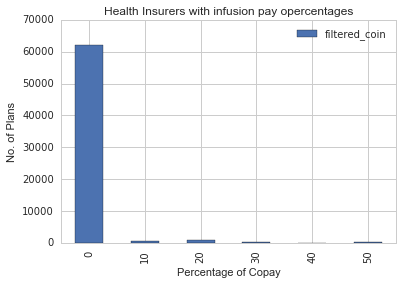

In [248]:
my_plot2 = category_group1.plot(kind='bar',stacked=False,title="Health Insurers with infusion pay opercentages")
my_plot2.set_xlabel("Percentage of Copay")
my_plot2.set_ylabel("No. of Plans")

So, there are a lot of plans that fall in the zero category. Those plans either have a 0% co-pay or just a flat fee for each infusion and therefore don’t have a copay. That’s problematic. we are just going to have to dump those plans out to get a better look at what a typical copay looks like.

Now we will just want to look at the plans that offer terrible coverage for infusions. It looks like the worst are those that make customers pay a 50% copay for infusions. we will create a subset for that.

In [249]:
fifty_copay = new_rate[coin] == "50"
highinf = new_rate[fifty_copay]

highinf.shape

(159, 34)

159 plans fit the bill. That’s a lot. Maybe there has been some sort of trend over time. Hopefully those plans have become fewer since the ACA fully rolled out.

In [197]:
state_group = highinf.groupby('StateCode')
state_group.size()
year_group = highinf.groupby('BusinessYear')
year_group.size()




BusinessYear
2014    76
2015    53
2016    30
dtype: int64

In [250]:
plothighinf = highinf[['filtered_coin','BusinessYear','StateCode']]
category_group=plothighinf.groupby(['BusinessYear','StateCode']).count()
category_group


filtered_coin
BusinessYear StateCode               
2014         AK                     8
             AZ                    30
             IA                     4
             ID                    12
             PA                    10
             TX                     8
             WI                     4
2015         IA                     2
             NJ                     6
             PA                    31
             SD                     9
             TX                     3
             WI                     2
2016         NJ                     7
             PA                    20
             TX                     3

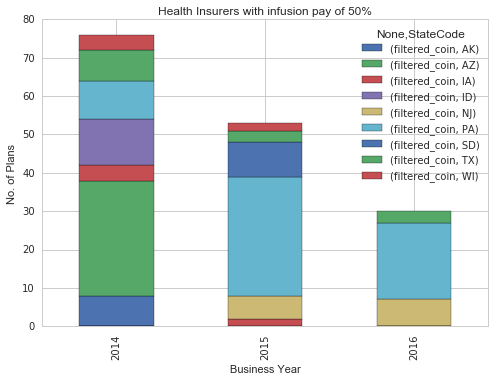

In [185]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Health Insurers with infusion pay of 50%")
my_plot.set_xlabel("Business Year")
my_plot.set_ylabel("No. of Plans")

The trend is good. The total number of plans that require a 50% copay has dropped pretty significantly. There were 76 in 2014, 53 in 2015, and 30 in 2016. Looks like Pennsylvania is a bad state to be in if you need chemotherapy. Many other states have completed exited the dataset in 2016 though. Arizon was a huge share in 2014 and now they have no plans with a 50% co-pay.